In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(' Image Data Shape ', digits.data.shape)

print(' Label Data Shape ', digits.target.shape)

 Image Data Shape  (1797, 64)
 Label Data Shape  (1797,)


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

Text(0.5, 1.0, 'Data Distribution')

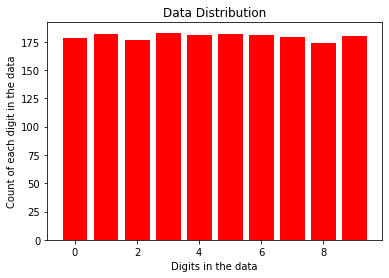

In [4]:
# Checking the data distribution
distribution = np.unique(digits.target, return_counts=True)
plt.bar(distribution[0], distribution[1], color = 'r')
plt.ylabel('Count of each digit in the data')
plt.xlabel('Digits in the data')
plt.title('Data Distribution')

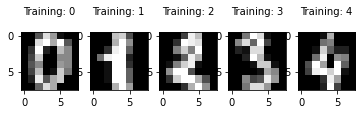

In [5]:
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 10)
    

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(x_train, y_train)

C:\Users\ShreyaB\Anaconda3\New folder\envs\Python3.6Test\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [10]:
# Predict for One Observation (image)
model.predict(x_test[0].reshape(1,-1))

array([2])

In [11]:
# Predict for Multiple Observations (images) at Once
model.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [12]:
# Store all predictions in one variable for the testing data-set
predictions = model.predict(x_test)

In [13]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
print('Accuracy is:',accuracy)

Accuracy is: 0.9511111111111111


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


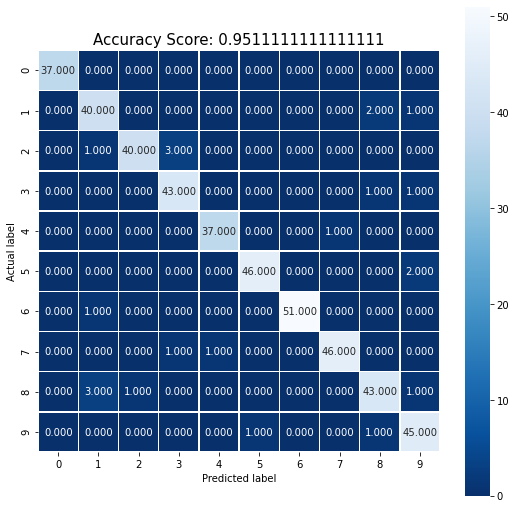

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [16]:
from sklearn import metrics

# For precision of each class individually use average= None
precision = metrics.precision_score(y_test, predictions, average='macro')
print('Precision is:',precision)

Precision is: 0.9525416898065957


In [17]:
from sklearn import metrics

# For recall of each class individually use average= None
recall = metrics.recall_score(y_test, predictions, average='macro')
print('Recall is:',recall)

Recall is: 0.9519279272592186


In [18]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return metrics.roc_auc_score(y_test, y_pred, average=average)
auc_score = multiclass_roc_auc_score(y_test, predictions)
print('AUC score is:', auc_score)

AUC score is: 0.9732447578709469


In [19]:
from sklearn import metrics

# For recall of each class individually use average= None
f1_score_value = metrics.f1_score(y_test, predictions, average='macro')
print('F1 Score is:',f1_score_value)

F1 Score is: 0.9518965775741322


# SVM

In [20]:
from sklearn import svm
from sklearn import metrics

In [23]:
svm_linear = svm.SVC(kernel ='linear')

In [24]:
# fit
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [25]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [26]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]], dtype=int64)

In [27]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9711111111111111

In [28]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [29]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC()

In [30]:
# predict
predictions = svm_rbf.predict(x_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9911111111111112


In [31]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [33]:
# results
import pandas as pd
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.672129,0.166909,0.066736,0.014178,1,0.01,"{'C': 1, 'gamma': 0.01}",0.866667,0.822222,0.836431,0.762082,0.847584,0.826997,0.035562,9
1,0.178646,0.031596,0.040176,0.007208,1,0.001,"{'C': 1, 'gamma': 0.001}",0.992593,0.992593,0.988848,0.985130,0.996283,0.991089,0.003795,3
2,0.137476,0.007620,0.040229,0.010930,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966667,0.974074,0.962825,0.970260,0.981413,0.971048,0.006388,6
3,0.627274,0.058949,0.079520,0.014665,10,0.01,"{'C': 10, 'gamma': 0.01}",0.877778,0.829630,0.847584,0.784387,0.858736,0.839623,0.031735,7
4,0.177792,0.046048,0.034023,0.007642,10,0.001,"{'C': 10, 'gamma': 0.001}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
5,0.071605,0.001651,0.021692,0.002043,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.985185,0.992593,0.981413,0.981413,0.996283,0.987377,0.006041,5
6,0.546288,0.089365,0.061661,0.007582,100,0.01,"{'C': 100, 'gamma': 0.01}",0.877778,0.829630,0.847584,0.784387,0.858736,0.839623,0.031735,7
7,0.146111,0.003550,0.032299,0.000516,100,0.001,"{'C': 100, 'gamma': 0.001}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
8,0.072275,0.003163,0.020934,0.000581,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.985185,0.988889,0.981413,0.985130,1.000000,0.988123,0.006392,4


In [34]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=1, gamma=0.001)

In [35]:
# predict
predictions = svm_final.predict(x_test)

In [36]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)


0.9955555555555555 

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.48775055679287305


array([[136,   0,   0,   4,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0, 102,   0,  24,   5,   8,   0,   0],
       [  0,   0,   0,  90,   2,  30,   9,   2,   0,   0],
       [  0,   0,   0, 123,   0,  10,   0,   4,   0,   1],
       [  0,   0,   0,  96,   5,   6,  22,  14,   0,   0],
       [  0,   0,   0,   5,   4, 118,   3,   3,   0,   1],
       [  1,   0,   0,   2,   4,   2, 120,   0,   0,   0],
       [  0,   0,   0,  16,   0,   3,   0, 112,   0,   0],
       [  3,   0,   0, 116,   0,   3,   0,   4,   0,   0],
       [  0,   0,   0,  79,   0,   0,   0,  11,   0,  43]], dtype=int64)

In [53]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.46


array([[33,  0,  0,  0,  1,  1,  0,  0,  0,  2],
       [ 0,  0,  0, 28,  0, 11,  3,  1,  0,  0],
       [ 1,  0,  0, 35,  0,  6,  2,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  5,  0,  2,  0,  0],
       [ 1,  0,  0, 25,  0,  1,  4,  7,  0,  0],
       [ 0,  0,  0,  3,  1, 42,  0,  1,  0,  1],
       [ 0,  0,  0,  2,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  2,  1, 33,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 29,  0,  3,  0,  3,  0, 12]], dtype=int64)

Using hyper parameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [58]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s


Wall time: 4.29 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [59]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010255,0.000419,0.001764,0.000311,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.320475,0.326409,0.332344,0.306548,0.321444,0.009570,46
1,0.010285,0.000142,0.001246,0.000430,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.320475,0.326409,0.332344,0.306548,0.321444,0.009570,46
2,0.010171,0.000430,0.000957,0.000426,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.320475,0.326409,0.332344,0.306548,0.321444,0.009570,46
3,0.009797,0.000280,0.001261,0.000425,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.320475,0.323442,0.335312,0.306548,0.321444,0.010236,46
4,0.008535,0.000671,0.001035,0.000197,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.293769,0.299703,0.299703,0.282738,0.293978,0.006927,50


In [60]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
40,0.036992,0.002458,0.001334,3.775451e-04,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.836795,0.830861,0.807122,0.818452,0.823307,0.011451,1
20,0.025078,0.000529,0.001282,4.158983e-04,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.839763,0.851632,0.786350,0.815476,0.823305,0.025001,2
15,0.029530,0.004128,0.000997,2.920019e-07,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.839763,0.851632,0.780415,0.809524,0.820333,0.027692,3
45,0.035161,0.001115,0.001239,2.421414e-04,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.827893,0.824926,0.798220,0.806548,0.814397,0.012413,4
21,0.023043,0.000524,0.000998,1.316710e-06,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.827893,0.813056,0.771513,0.764881,0.794336,0.026763,5


In [61]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [62]:
dt_best = grid_search.best_estimator_

In [65]:
print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_best.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_best.predict(x_test)))

Train Accuracy : 0.9279881217520416
Train Confusion Matrix:
[[136   0   2   0   0   0   0   1   2   0]
 [  1 129   0   0   2   3   1   1   1   1]
 [  1   2 127   0   0   1   0   0   1   1]
 [  0   0   5 127   0   2   2   0   0   2]
 [  0   5   2   0 133   0   2   0   0   1]
 [  0   2   2   0   2 124   1   0   1   2]
 [  0   2   1   0   1   2 122   0   1   0]
 [  0   0   1   0   3   1   0 121   3   2]
 [  4   7   4   0   1   1   0   1 108   0]
 [  1   0   0   2   0   0   0   1   6 123]]
--------------------------------------------------
Test Accuracy : 0.7977777777777778
Test Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  1]
 [ 0 40  0  0  0  0  1  0  0  2]
 [ 1  2 33  2  0  0  1  0  3  2]
 [ 0  1  4 36  0  1  0  0  1  2]
 [ 0  0  0  0 34  0  0  2  1  1]
 [ 0  4  0  0  4 39  0  0  0  1]
 [ 0  1  0  0  0  3 48  0  0  0]
 [ 0  1  0  2  2  1  0 41  1  0]
 [ 6  6  6  1  4  2  0  1 18  4]
 [ 2  2  0  4  0  3  0  1  0 35]]


## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3)

In [70]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [71]:
print("Train Accuracy :", accuracy_score(y_train, rf.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf.predict(x_test)))

Train Accuracy : 0.8396436525612472
Train Confusion Matrix:
[[138   0   0   0   3   0   0   0   0   0]
 [  1  77  10   1  22   0   2  12   4  10]
 [  0   0 126   1   0   0   2   2   0   2]
 [  0   3   4 118   0   5   0   5   1   2]
 [  1   0   0   0 135   0   3   4   0   0]
 [  4   0   0   0   4 119   1   0   0   6]
 [  2   1   0   0   1   1 124   0   0   0]
 [  0   1   0   1   6   1   0 122   0   0]
 [  3  16   8  12   3   2   7  11  57   7]
 [  0   0   1   3   3   3   1   5   2 115]]
--------------------------------------------------
Test Accuracy : 0.7933333333333333
Test Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 25  4  1  7  1  1  0  1  3]
 [ 1  1 36  1  0  0  1  0  1  3]
 [ 0  0  3 33  0  3  1  1  1  3]
 [ 1  0  0  0 36  0  0  1  0  0]
 [ 2  1  0  0  5 38  1  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  4  0  0 44  0  0]
 [ 1  3  6  3  4  0  3  7 17  4]
 [ 0  1  0  1  1  2  1  1  0 40]]


In [72]:
#hyperparameter tuning
classifier_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [73]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [74]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [76]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.7min finished


Wall time: 1min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [77]:
rf_best = grid_search.best_estimator_

In [78]:
print("Train Accuracy :", accuracy_score(y_train, rf_best.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best.predict(x_test)))

Train Accuracy : 0.9925760950259837
Train Confusion Matrix:
[[140   0   0   0   1   0   0   0   0   0]
 [  0 139   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 138   0   0   0   0   0   0]
 [  0   0   0   0 141   0   0   2   0   0]
 [  0   0   0   0   1 133   0   0   0   0]
 [  0   0   0   0   0   0 129   0   0   0]
 [  0   0   0   0   0   0   0 131   0   0]
 [  0   3   0   0   0   0   0   0 123   0]
 [  0   0   0   1   0   1   0   1   0 130]]
--------------------------------------------------
Test Accuracy : 0.9533333333333334
Test Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 42  1  0  0  0  0  0  1]
 [ 0  0  1 42  0  0  0  0  1  1]
 [ 0  0  0  0 36  0  0  2  0  0]
 [ 0  0  0  1  0 47  0  0  0  0]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  0  1  0  1  0  1 42  0]
 [ 0  0  0  1  0  2  0  1  0 43]]
